# Watershed for H&E images segmentation

In the study of image processing, a watershed is a transformation defined on a grayscale image. The name refers metaphorically to a geological watershed, or drainage divide, which separates adjacent drainage basins. The watershed transformation treats the image it operates upon like a topographic map, with the brightness of each point representing its height, and finds the lines that run along the tops of ridges.

(source : https://en.wikipedia.org/wiki/Watershed_(image_processing))

We applied this algorithm on one image of PDAC dataset (B2) in order to segment nuclei

As a reminder, we finally chose to do the segmentation with Visiopharm.

# 1. Import packages and data

conda env create -f env_cellpose.yml --name cellpose

conda activate cellpose

pip install ipykernel

python -m ipykernel install --user --name=cellpose --display-name=Cellpose

pip install imagecodecs

pip install opencv-python

https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
image = cv2.imread("PanCN_AVD_61VQ_0158_normalized.jpg")

Output files:

In [5]:
## Result folder 
output_files= f"/sbgenomics/output-files/data/segmentation_watershed"
os.makedirs(output_files, exist_ok=True)

## workspace folder
output_workspace = f"./watershed/segmented_images"
os.makedirs(output_workspace, exist_ok=True)

## 2. Perform watershed

In [8]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

Text(0.5, 1.0, 'Original image')

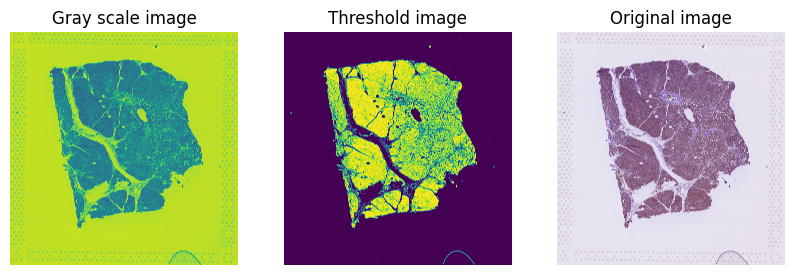

In [23]:
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 3
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(gray)
plt.axis('off')
plt.title("Gray scale image")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(thresh)
plt.axis('off')
plt.title("Threshold image")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(image)
plt.axis('off')
plt.title("Original image")


In [24]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

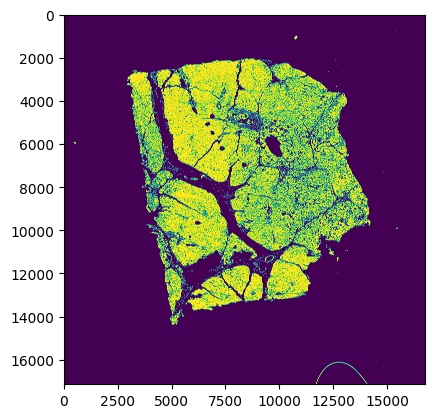

In [25]:
plt.imshow(opening)
plt.show()

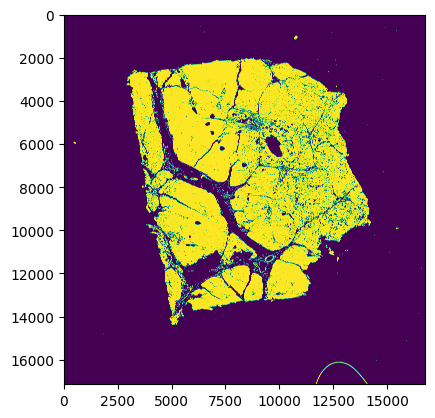

In [26]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg)
plt.show()

In [37]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

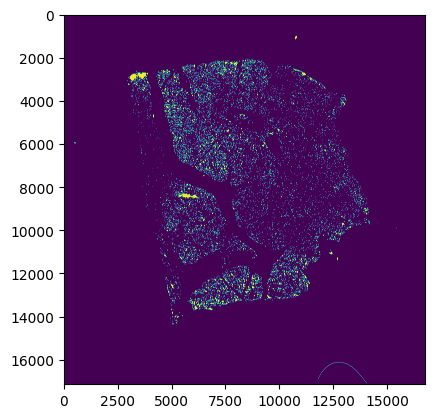

In [38]:
plt.imshow(sure_fg)
plt.show()

In [39]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [43]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

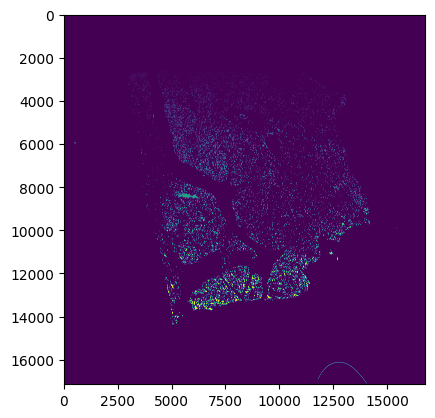

In [44]:
plt.imshow(markers)
plt.show()

In [41]:
markers = cv2.watershed(image,markers)
image[markers == -1] = [255,0,0]

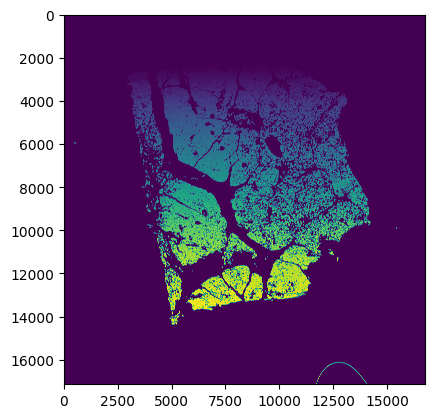

In [42]:
plt.imshow(markers)
plt.show()

In [45]:
len(np.unique(markers))

23770